# **「possumt.csv」は、オーストラリアとパプアニューギニアで捕らえられたポッサムのデータです**

体長やしっぽの長さ、胴回りの大きさ、目の位置などからポッサムがオスかメスかを予測するモデルを作成しましょう。

【ヒント】今回作成するモデルの目的変数は「sex」です。
　f:female:メス
　m:male：オス　となります。


**▼ポッサム**

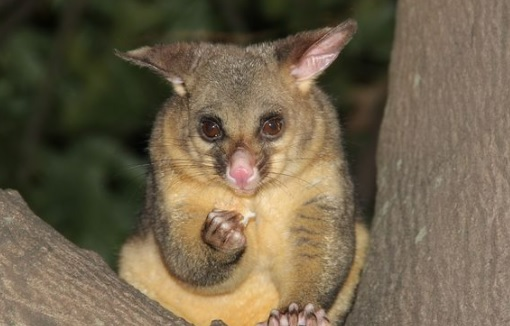





# **以下の処理を必ず実装してください**

・「possum.csv」を読み込む

・読み込んだデータの先頭行を表示しデータの内容を確認する

・データ内の欠損値の有無を確認する

・欠損値がある場合、適切な方法で欠損値を補完する

・読み込んだ説明変数データに文字列のデータが存在する場合は適切にエンコーディングを行う

・目的変数の列、説明変数の列をそれぞれ変数に代入する

・「train_test_split」を使って学習データとテストデータに分割する
　（test_size = 0.2 ,random_state = 55 とすること）

・サポートベクターマシン（SVC）を使うために、モデルの初期化、学習を行う

・学習データ、テストデータのスコアを表示する



In [3]:
# pandasのライブラリ
import pandas as pd
# 機械学習ライブラリ
import sklearn
import numpy as np

In [4]:
# csvを読み込む
possum = pd.read_csv("possum.csv")
possum

,sex,head_length_mm,skull_width_mm,total_length_cm,taill,foot_length,earconch,eye,chest,belly
0,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...
99,m,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,m,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,f,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,m,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [5]:
# nullがあるかどうか確認
possum.isnull().sum()

sex                0
head_length_mm     0
skull_width_mm     0
total_length_cm    0
taill              0
foot_length        1
earconch           0
eye                0
chest              0
belly              0
dtype: int64

In [6]:
# nullを中央値(median)で補完して再確認
possum = possum.fillna(possum.median())
possum.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


sex                0
head_length_mm     0
skull_width_mm     0
total_length_cm    0
taill              0
foot_length        0
earconch           0
eye                0
chest              0
belly              0
dtype: int64

In [7]:
# 各列の型を確認する
print(possum.dtypes)

sex                 object
head_length_mm     float64
skull_width_mm     float64
total_length_cm    float64
taill              float64
foot_length        float64
earconch           float64
eye                float64
chest              float64
belly              float64
dtype: object


In [8]:
# 学習データとテストデータを分けるライブラリの読み込み
from sklearn.model_selection import train_test_split

# X に説明変数の列を代入する
X = possum.iloc[:, 1:]
# yに目的変数の列（性別）を代入する
y = possum.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [9]:
# 説明変数の表示
X_train

,head_length_mm,skull_width_mm,total_length_cm,taill,foot_length,earconch,eye,chest,belly
81,86.0,54.0,82.0,36.5,60.7,42.9,15.4,26.0,32.0
14,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
78,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
8,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
82,90.0,53.8,81.5,36.0,62.0,43.3,14.0,25.0,29.0
...,...,...,...,...,...,...,...,...,...
29,92.1,54.4,84.0,33.5,70.6,50.8,14.5,24.5,33.0
72,82.5,52.3,82.0,36.5,65.7,44.7,16.0,23.5,28.0
39,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
26,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0


In [10]:
# 目的変数の表示
y_train

81    f
14    m
78    m
8     f
82    f
     ..
29    f
72    m
39    f
26    f
77    m
Name: sex, Length: 83, dtype: object

In [11]:
# SVMのライブラリの読み込み
from sklearn.svm import LinearSVC # 分類
from sklearn.linear_model import LinearRegression # 回帰

# モデルの初期化（インスタンス化）を行う
model = LinearSVC()

# 学習データで学習を行う
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [12]:
# 学習データの正解率の出力
print('正解率(学習データ):', model.score(X_train, y_train))
print('正解率(学習データ):{:.3f}'.format(model.score(X_train, y_train)))

正解率(学習データ): 0.40963855421686746
正解率(学習データ):0.410


In [13]:
# テストデータで予測を行う
result = model.predict(X_test)

# 予測結果を表示する
print(result)

['f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f'
 'f' 'f' 'f']
